In [5]:
import numpy as np
data = np.load('/content/bloodmnist.npz')

In [6]:
print(data.files)

['train_images', 'train_labels', 'val_images', 'val_labels', 'test_images', 'test_labels']


In [19]:
X_train = data['train_images']
y_train = data['train_labels']
X_val = data['val_images']
y_val = data['val_labels']
X_test = data['test_images']
y_test = data['test_labels']
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(11959, 28, 28, 3)
(11959, 1)
(1712, 28, 28, 3)
(1712, 1)
(3421, 28, 28, 3)
(3421, 1)


In [20]:
print('Normalizing Images')
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255
print(X_train.min())
print(X_train.max())


Normalizing Images
0.0
1.0


In [27]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
print("One hot encoding labels...")
num_classes = 8
y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

y_train_hot = to_categorical(y_train, num_classes)
y_val_hot = to_categorical(y_val, num_classes)
y_test_hot = to_categorical(y_test, num_classes)
print(y_train[0])
print(y_train_hot[0])
print('---- Preprocesssing Complete ----')

One hot encoding labels...
7
[0. 0. 0. 0. 0. 0. 0. 1.]
---- Preprocesssing Complete ----


In [23]:
has_missing_images = np.isnan(X_train).any()
has_missing_labels = np.isnan(y_train).any()
if not has_missing_images and not has_missing_labels:
    print("No missing values found in the dataset.")
else:
    print("Missing values found in the dataset.")

No missing values found in the dataset.


In [28]:
from tensorflow.keras import  models, layers
input_shape = (28,28,3)
num_classes = 8

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,352 (880.28 KB)

 Trainable params: 225,352 (880.28 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
print('---- Start Training -----')
epochs = 20
batch_size = 32

history = model.fit(
    X_train, y_train_hot,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val_hot)
)

print('---- Training complete ----')

---- Start Training -----
Epoch 1/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9925 - loss: 0.0277 - val_accuracy: 0.9393 - val_loss: 0.2502
Epoch 2/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9913 - loss: 0.0292 - val_accuracy: 0.9322 - val_loss: 0.2845
Epoch 3/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9410 - val_loss: 0.2708
Epoch 4/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9969 - loss: 0.0143 - val_accuracy: 0.9387 - val_loss: 0.2924
Epoch 5/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9905 - loss: 0.0262 - val_accuracy: 0.9346 - val_loss: 0.2610
Epoch 6/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9943 - loss: 0.0196 - val_accuracy: 0.9404 - val_loss: 0.2493
Epoch 7/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9970 - loss: 0.0127 - val_accuracy: 0.9422 - val_loss: 0.2732
Epoch 8/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy

---- Evaluating on test data.... -----
107/107 - 2s - 20ms/step - accuracy: 0.9307 - loss: 0.3612
Test accuracy: 93.072200%


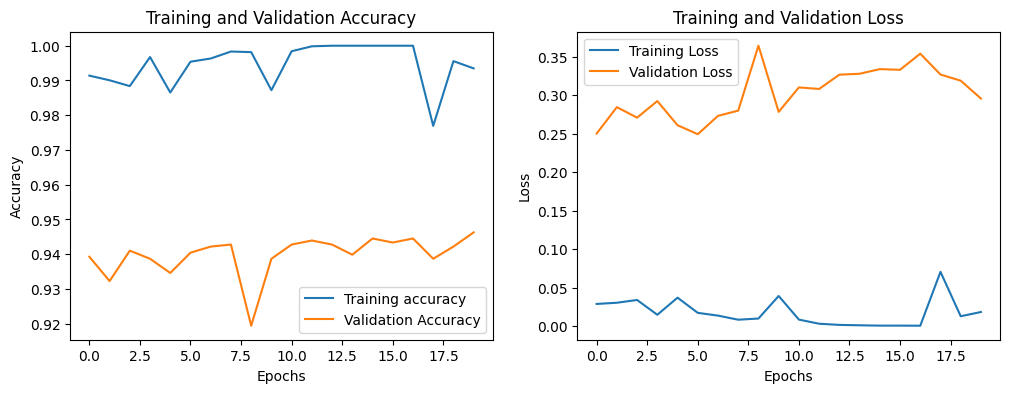

In [38]:
import matplotlib.pyplot as plt

print('---- Evaluating on test data.... -----')
test_loss, test_acc = model.evaluate(X_test, y_test_hot, verbose=2)
print(f'Test accuracy: {test_acc*100:2f}%')

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Displaying the first 25 images from the training set...


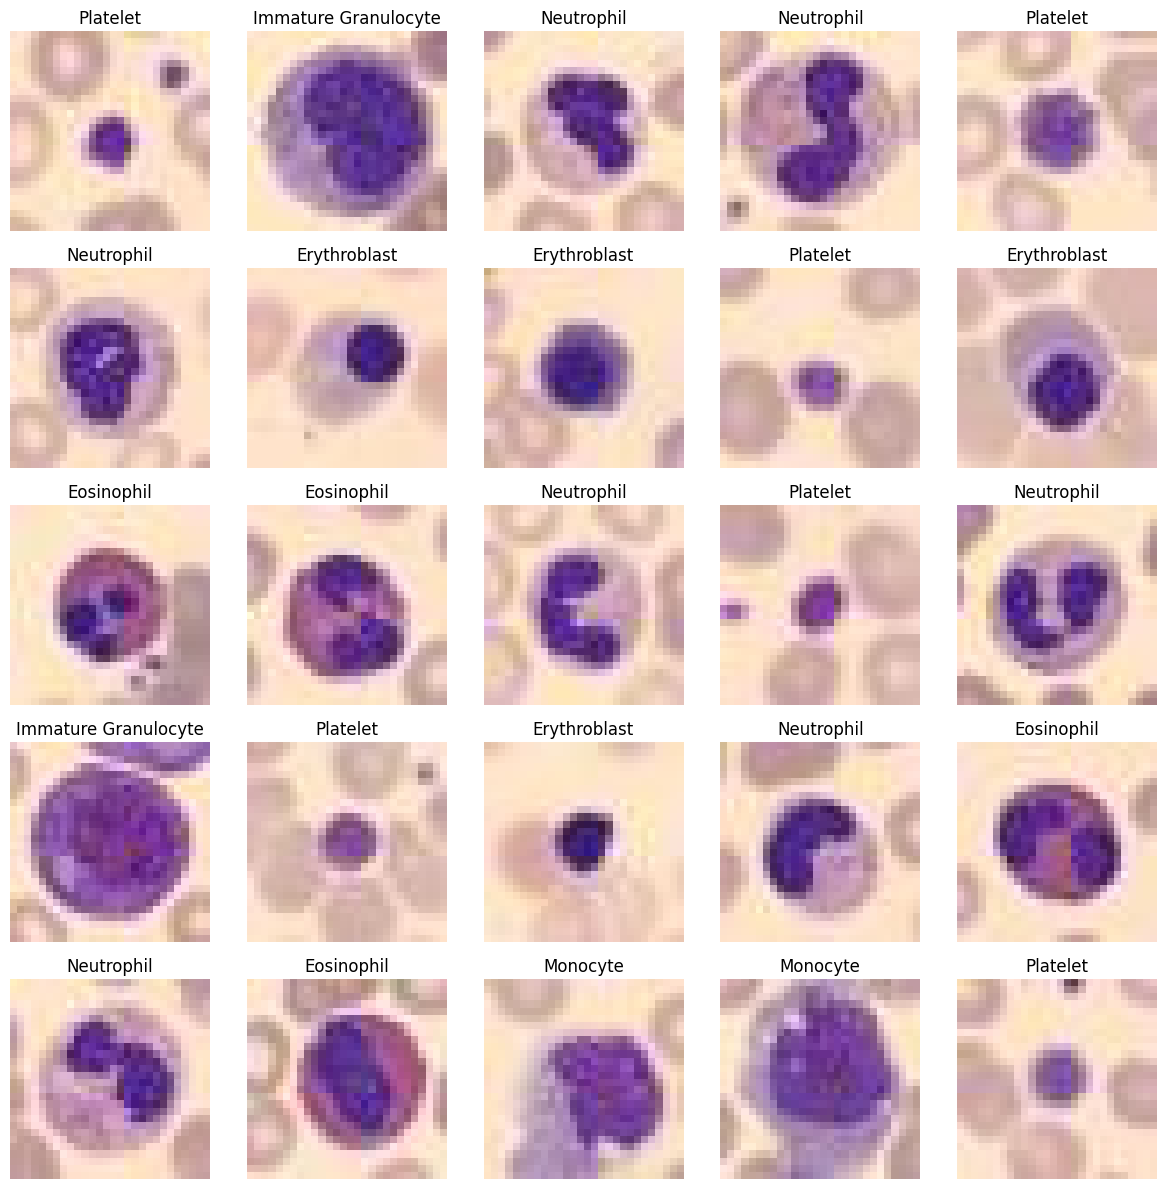

In [40]:
label_map = {
    0: 'Basophil',
    1: 'Eosinophil',
    2: 'Erythroblast',
    3: 'Immature Granulocyte',
    4: 'Lymphocyte',
    5: 'Monocyte',
    6: 'Neutrophil',
    7: 'Platelet'
}

print("Displaying the first 25 images from the training set...")

plt.figure(figsize=(12, 12))

for i in range(25):
    plt.subplot(5, 5, i + 1)

    plt.imshow(X_train[i])

    label_index = y_train[i]

    title = label_map[label_index]

    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.argmax(y_test_hot, axis=1)

label_map = {
    0: 'Basophil',
    1: 'Eosinophil',
    2: 'Erythroblast',
    3: 'Immature Granulocyte',
    4: 'Lymphocyte',
    5: 'Monocyte',
    6: 'Neutrophil',
    7: 'Platelet'
}
class_names = list(label_map.values())

print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=class_names))

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

--- Classification Report ---
                      precision    recall  f1-score   support

            Basophil       0.84      0.91      0.87       244
          Eosinophil       0.99      0.98      0.98       624
        Erythroblast       0.93      0.95      0.94       311
Immature Granulocyte       0.83      0.87      0.85       579
          Lymphocyte       0.93      0.92      0.93       243
            Monocyte       0.87      0.84      0.85       284
          Neutrophil       0.98      0.93      0.96       666
            Platelet       1.00      0.99      1.00       470

            accuracy                           0.93      3421
           macro avg       0.92      0.92      0.92      3421
        weighted avg       0.93      0.93      0.93      3421



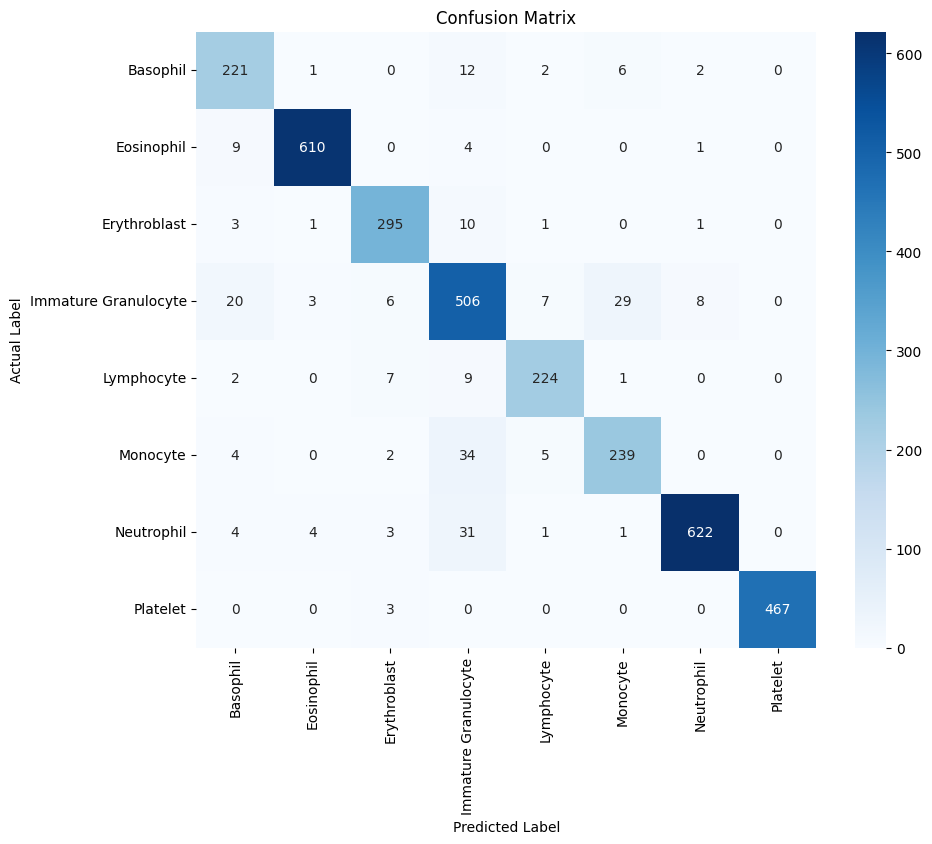

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()